In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from upsetplot import plot
from matplotlib import pyplot as plt
import numpy as np

ImportError: cannot import name 'get_renderer' from 'matplotlib.tight_layout' (/rsrch4/home/mol_cgenesis/nkdang/miniconda3/envs/cdr3/lib/python3.10/site-packages/matplotlib/tight_layout.py)

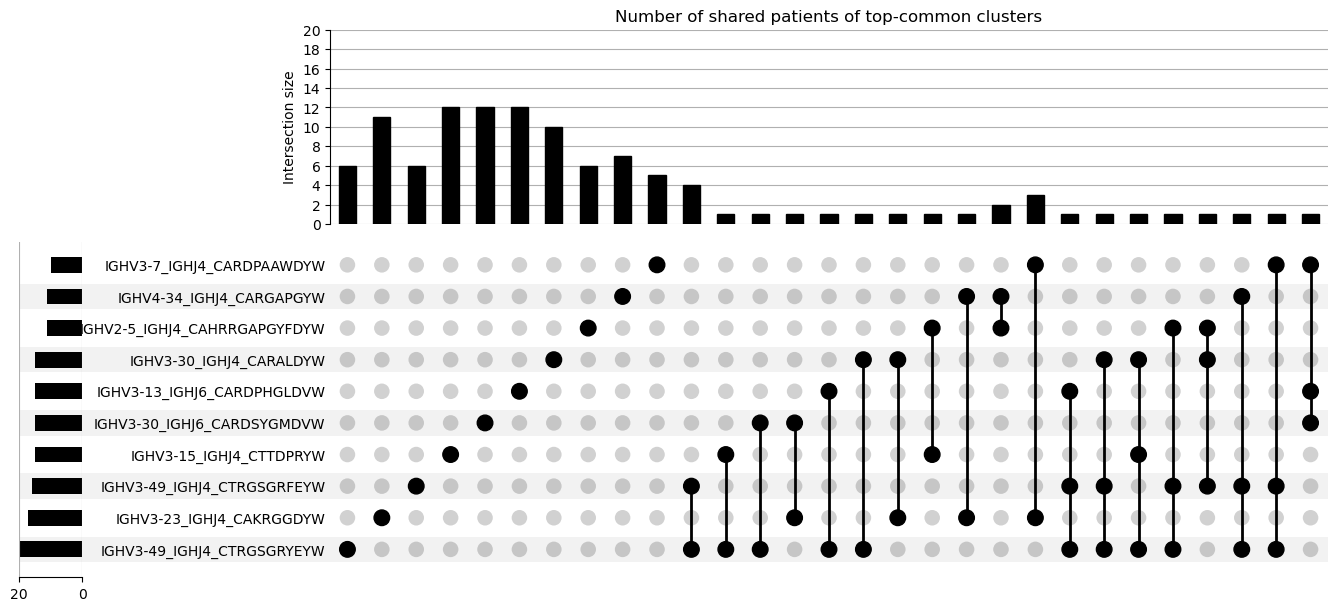

In [6]:
num_tops = 10

summary = pd.read_csv("/rsrch4/scratch/mol_cgenesis/nkdang/CDR3/results/LUAD/clustering_group/summary.tsv", sep='\t')
name_tops = summary['v_call']+"_"+summary['j_call']+"_"+summary['junction_aa']
name_tops = name_tops[:num_tops]

sets = [set(pd.read_csv(next(Path("/rsrch4/scratch/mol_cgenesis/nkdang/CDR3/results/LUAD/clustering_group/clusters").glob(f"**/{name_tops[i]}*")), sep='\t')['patient_id'].unique()) for i in range(num_tops)]

set_names = [i for i in name_tops]
all_elems = set.union(*sets)
df = pd.DataFrame([[e in s for s in sets] for e in all_elems], columns = set_names)
df_up = df.groupby(set_names).size()
plot(df_up, orientation='horizontal')
plt.title("Number of shared patients of top-common clusters")
plt.yticks(np.arange(0, 22, 2)) 
plt.show()